In [211]:
import matplotlib.pyplot as plt
import numpy as np

def plot_graph(x_data, y_data, title, x_label='x', y_label='y', y_max=None, rotate=0):
  x = np.arange(len(x_data))  # the label locations
  width = 0.2  # the width of the bars
  multiplier = 0

  fig, ax = plt.subplots(layout='constrained')

  for attribute, measurement in y_data.items():
    color = 'mediumseagreen' if 'CUDA' in attribute else 'blue' if 'OpenACC' in attribute else 'peru'
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
    ax.bar_label(rects, padding=5, rotation=rotate)
    multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel(y_label)
  ax.set_xlabel(x_label)
  ax.set_title(title)
  ax.set_xticks(x + width, x_data)
  ax.legend(loc='upper left')
  ax.set_ylim(0, y_max)

  plt.show()

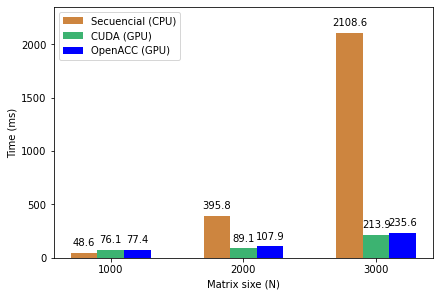

In [218]:

sizes = ("1000", "2000", "3000")
times = {
    'Secuencial (CPU)': (48.6, 395.8, 2108.6),
    'CUDA (GPU)': (76.1, 89.1, 213.9),
    'OpenACC (GPU)': (77.4, 107.9, 235.6),
}

plot_graph(
    x_data=sizes,
    y_data=times,
    title='',
    x_label='Matrix sixe (N)',
    y_label='Time (ms)',
    y_max=2350
)

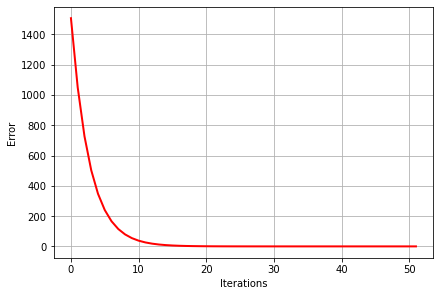

In [204]:
import matplotlib.pyplot as plt
import numpy as np

# error_1000
#error = [596.906, 162.505, 44.2197, 12.0305, 3.273, 0.890452, 0.242256, 0.065908, 0.0179309, 0.00487828, 0.00132718, 0.000361072, 9.82332e-05, 2.67253e-05, 7.27087e-06, ]

error = [1507.53, 1049.83, 727.47, 502.83, 347.448, 240.093, 165.905, 114.641, 79.2169, 54.7391, 37.8248, 26.137, 18.0608, 12.48, 8.62373, 5.95901, 4.11769, 2.84534, 1.96613, 1.3586, 0.938798, 0.648712, 0.448261, 0.30975, 0.214038, 0.147901, 0.1022, 0.0706202, 0.0487987, 0.03372, 0.0233006, 0.0161008, 0.0111257, 0.00768787, 0.00531234, 0.00367084, 0.00253656, 0.00175277, 0.00121117, 0.000836918, 0.000578313, 0.000399615, 0.000276135, 0.00019081, 0.00013185, 9.11088e-05, 6.29564e-05, 4.3503e-05, 3.00607e-05, 2.0772e-05, 1.43535e-05, 9.9183e-06, ]

error_log = np.log(error)

# fig, (ax0, ax1) = plt.subplots(2, 1, layout='constrained')
fig, ax = plt.subplots(layout='constrained')

ax.plot(error, 'r', linewidth=2)
# ax.set_xlim(0, 5)
# ax.set_title('MAE for CPU method (N=3000)')
ax.set_xlabel('Iterations')
ax.set_ylabel('Error')
ax.grid(True)

plt.show()

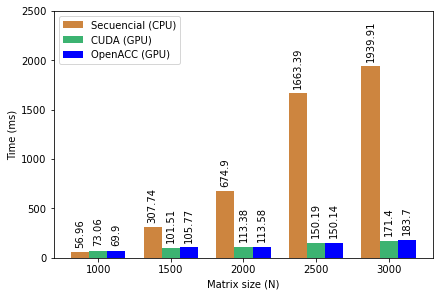

In [179]:
static_sizes = ("1000", "1500", "2000", "2500", "3000")
static_times = {
    'Secuencial (CPU)': (56.96, 307.74, 674.90, 1663.39, 1939.91),
    'CUDA (GPU)': (73.06, 101.51, 113.38, 150.19, 171.40),
    'OpenACC (GPU)': (69.90, 105.77, 113.58, 150.14, 183.70),
}

plot_graph(static_sizes, static_times, '', 'Matrix size (N)', 'Time (ms)', 2500, 90)

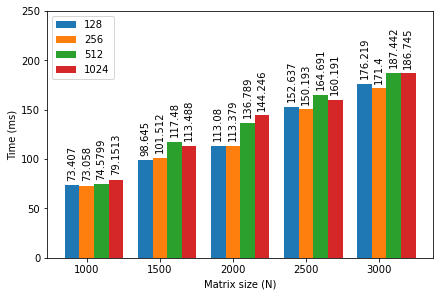

In [200]:
m_sizes = ("1000", "1500", "2000", "2500", "3000")
speedups = {
    '128': (73.407, 98.645, 113.080, 152.637, 176.219),
    '256': (73.058, 101.512, 113.379, 150.193, 171.400),
    '512': (74.5799, 117.4804, 136.7887, 164.6906, 187.4418),
    '1024': (79.15128, 113.4879, 144.2464, 160.1915, 186.7451)
}

plot_graph(m_sizes, speedups, '', 'Matrix size (N)', 'Time (ms)', 250, 90)

In [167]:
def plot_lines(x_data, y_data, title, x_label='x', y_label='y', y_max=None):
  x = np.arange(len(x_data))  # the label locations

  plt.figure(figsize=(9,6))

  for attribute, measurement in y_data.items():
    color = 'green' if attribute == 'CUDA' else 'blue'
    plt.plot(x, measurement, 'o-', label=attribute, color=color)
    for i,j in zip(x,measurement):
      y_offset = 0.7 if attribute == 'CUDA' else -0.9
      x_offset = -0.2 if attribute == 'CUDA' else 0
      plt.annotate(str(j),xy=(i+x_offset,j+y_offset), color=color)

  plt.legend(loc='lower right')
  plt.ylabel(y_label)
  plt.xlabel(x_label)
  plt.title(title)
  plt.xticks(ticks=x, labels=x_data)
  plt.ylim(-1, y_max)
  plt.xlim(-0.6, len(x_data) - 0.4)
  

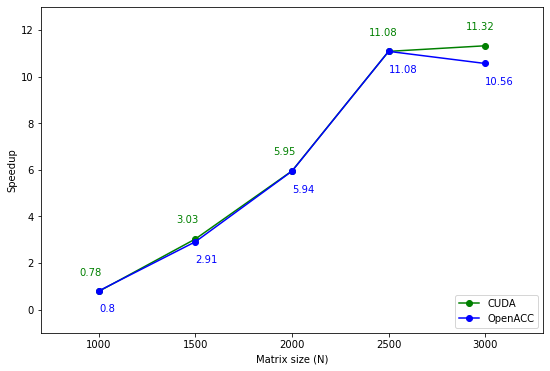

In [220]:
m_sizes = ("1000", "1500", "2000", "2500", "3000")
speedups = {
    'CUDA': (0.78, 3.03, 5.95, 11.08, 11.32),
    'OpenACC': (0.80, 2.91, 5.94, 11.08, 10.56),
}
plot_lines(m_sizes, speedups, '', 'Matrix size (N)', 'Speedup', 13)